In [ ]:
# datasets
import kagglehub
ciplab_real_and_fake_face_detection_path = kagglehub.dataset_download('ciplab/real-and-fake-face-detection')

print('Data source import complete.')


100%|██████████| 431M/431M [00:04<00:00, 95.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
https://drive.google.com/file/d/1bfmIoikfIQSWTSnAVw-gDka-znXkn6mc/view?usp=sharing
https://drive.google.com/file/d/1bVS8MIc1DXWNB7ThB8-Qi2-Wal7rlF6p/view?usp=drive_link

SyntaxError: invalid decimal literal (<ipython-input-2-d0f7cf996ae6>, line 1)

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator


## DataFrame Making for the Data
*Content of the Datafarme***
1. Col Paths 'Image Absolute Path'
2. Col Real '1 if Real, 0 if Fake

In [ ]:
# load real vs fake data
real_path = os.path.join(ciplab_real_and_fake_face_detection_path, 'real_and_fake_face', 'training_real')
fake_path = os.path.join(ciplab_real_and_fake_face_detection_path, 'real_and_fake_face', 'training_fake')

# Store Image's Path and Labels
def load_image_paths_labels(folder_path, label):
    image_paths = []
    labels = []
    for file in os.listdir(folder_path):
        image_paths.append(os.path.join(folder_path, file))
        labels.append(label)
    return image_paths, labels

# real as 1, fake as 0
real_paths, real_labels = load_image_paths_labels(real_path, '1') # Store Real Images
fake_paths, fake_labels = load_image_paths_labels(fake_path, '0') # Store Fake Images

image_paths = real_paths + fake_paths # Merge Real & Fake Paths
labels = real_labels + fake_labels # Merge Real & Fake Labels

RealDf = pd.DataFrame({'Paths': real_paths, 'Labels':real_labels})
FakeDf = pd.DataFrame({'Paths': fake_paths, 'Labels':fake_labels})
MeregedDf = pd.DataFrame({'Paths': image_paths, 'Real':labels})

## Exploreing the Data

Real Data:                                                Paths Labels
0  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
1  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
2  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
3  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
4  /root/.cache/kagglehub/datasets/ciplab/real-an...      1
Real Data Size : (1081, 2)
--------------------------------------------------------------------------------------------------
Fake Data:                                                Paths Labels
0  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
1  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
2  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
3  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
4  /root/.cache/kagglehub/datasets/ciplab/real-an...      0
Fake Data Size: (960, 2)
--------------------------------------------------------------------------------------------------
Mereged 

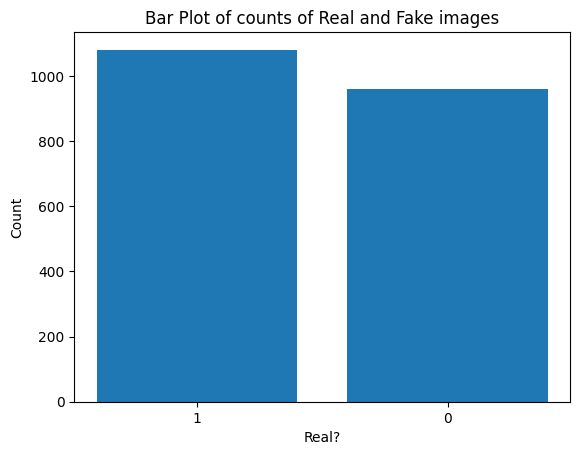

In [ ]:
#count data
print(f"Real Data: {RealDf.head()}")
print(f"Real Data Size : {RealDf.shape}")
print("-"*98)
print(f"Fake Data: {FakeDf.head()}")
print(f"Fake Data Size: {FakeDf.shape}")
print("-"*98)
print(f"Mereged Data: {MeregedDf.head()}")
print(f"Mereged Data Size: {MeregedDf.shape}")
print("-"*98)

#visual
value_counts = MeregedDf.value_counts('Real')
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Real?')
plt.ylabel('Count')
plt.title('Bar Plot of counts of Real and Fake images')
plt.xticks([0,1])
plt.show()

## Flatten & Normlize the Images
*Flatten the Images："Convert it from Matrix to Array of Values"*

*Normalize the Image "Convert Values to Be from 0 to 1"*

In [ ]:
# reshape to 128; make images array of 0 to 1.
def ProcessingImage(path, target_size=(128, 128), color_mode='rgb'):
    img = load_img(path, color_mode = color_mode, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array/255.0
    return img_array

MeregedDf['image'] = MeregedDf['Paths'].apply(ProcessingImage)

## Divide the Data to Training Data & Testing Data
1. Training Data are 80% of Data
2. Testing Data are 20% of Data

In [ ]:
# 80% train, 20% test
TrainDf, TestDf = train_test_split(MeregedDf, test_size=0.2, stratify=MeregedDf['Real'], random_state = 123)

XTrain = np.stack(TrainDf['image'].values)
YTrain = TrainDf['Real'].values
XTest = np.stack(TestDf['image'].values)
YTest = TestDf['Real'].values

## The Models Making Using CNNs
*Model 1*
1. Using SGD Optimizier

*Model 2*
1. Using ADAM Optimizier

*Model 1 & Model 2 are Using 6 Layers Arranged as*
1. Conv2D
2. MaxPooling 2D
3. Conv2D
4. MaxPooling 2D
5. Flatten  *It Is Not a Layer*
6. Relu "Activation Function"
7. Sigmoid "Activation Function" *Output Layer*

In [ ]:
#Adam and SGD initialize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

def modelSGD():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    opt = SGD(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def modelADAM():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(1, activation = 'sigmoid'))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Plotting the Performance Result the Model
# evaluate with loss and accuracy
def eval(results, model):
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(results.history['loss'], color='blue', label='train')
    plt.plot(results.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(results.history['accuracy'], color='blue', label='train')
    plt.plot(results.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.legend()
    loss, acc = model.evaluate(XTest, YTest, verbose=0)
    print('Cross Entropy Loss: %.2f' % loss)
    print('Validation Accuracy: %.2f%%' % (acc * 100.0))

## Analysis of the Model Performance
## *Using*
## 1. Recall
## 2. Percision
## 3. Confusion Matrix
## 4. Accuerrcy

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

def Analysis(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    metrics = ['Accuracy', 'Precision', 'Recall']
    scores = [accuracy, precision, recall]

    plt.bar(metrics, scores)

    for i, score in enumerate(scores):
        plt.text(i, score+0.02, f'{score:.2f}', ha='center', va='bottom', fontsize = 10)

    plt.ylim(0,1.1)
    plt.title('Accuracy, Precision and Recall Scores')
    plt.show()

    conf = confusion_matrix(true_labels, predicted_labels)
    labels = ['Real', 'Fake']

    conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')
    plt.show()

## Visual Sample of the Exsits Images with
1. Real Class
2. Expected Class

In [ ]:
#visualize
def VisualImages(Labels):
    indices = np.random.choice(len(XTest), 10)

    disp_img = XTest[indices]
    disp_img_lab = YTest[indices]

    fig, axes = plt.subplots(nrows=2, ncols = 5, figsize = (15,8))
    fig.suptitle('Images with their Predicted and Actual Labels', fontsize=20)

    for i, ax in enumerate(axes.flat):
        ax.imshow(disp_img[i])
        ax.axis('off')

        actual_label = 'Real' if disp_img_lab[i] == 1 else 'Fake'
        predicted_label = 'Real' if Labels[i] == 1 else 'Fake'
        ax.set_title('Actual: ' +actual_label +'\n' + 'Predicted: ' + predicted_label)

    plt.tight_layout()
    plt.show()

# Base Model

## Model 1 "SGD"

In [ ]:
#train sgd
YTrain = YTrain.astype(np.float32)
YTest = YTest.astype(np.float32)
model_SGD = modelSGD()
model_SGD.summary()
history_SGD = model_SGD.fit(XTrain, YTrain, epochs=20, batch_size=32, validation_data=(XTest, YTest))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,765,505 (56.33 MB)

 Trainable params: 14,765,505 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.4987 - loss: 0.7605 - val_accuracy: 0.5648 - val_loss: 0.6844
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5489 - loss: 0.7179 - val_accuracy: 0.6259 - val_loss: 0.6604
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5953 - loss: 0.6637 - val_accuracy: 0.5403 - val_loss: 0.6880
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5979 - loss: 0.6783 - val_accuracy: 0.5868 - val_loss: 0.6653
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6177 - loss: 0.6408 - val_accuracy: 0.5623 - val_loss: 0.6987
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6522 - loss: 0.6341 - val_accuracy: 0.6333 - val_loss: 0.6508
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6318 - loss: 0.6400 - val_accuracy: 0.5379 - val_loss: 0.7212
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6549 - loss: 0.6329 - val_accuracy: 0.6161 - v

Using SDG Optmizier
Cross Entropy Loss: 0.65
Validation Accuracy: 63.57%


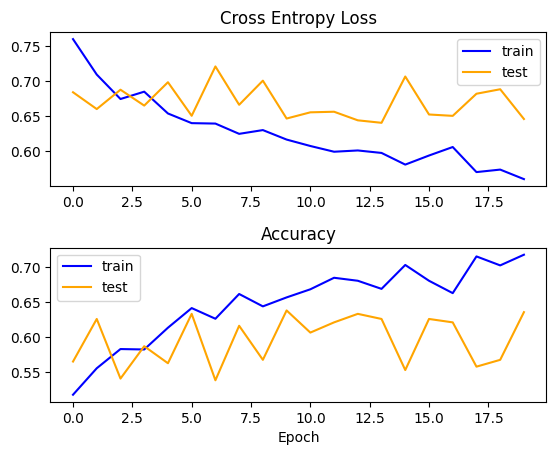

In [ ]:
#evaluate
print("Using SDG Optmizier")
eval(history_SGD, model_SGD)

In [ ]:
#result to matrix 0 to 1
SGDPredictions = model1.predict(XTest)
SGDPredictedLabels = np.round(SGDPredictions).flatten().astype(int)
SGDTrueLabels = np.round(YTest).flatten().astype(int)
# print(SGDPredictedLabels)
# print(SGDTrueLabels)

#precision：predicted real and actually real
#recall：total predicted as real
#accuracy：correctly predicted real and fake
Analysis(SGDTrueLabels,SGDPredictedLabels)

#A few examples
# VisualImages(SGDPredictedLabels)

NameError: name 'model1' is not defined

## Model 2 "ADAM"

In [ ]:
model_ADAM = modelADAM()
model_ADAM.summary()
history_ADAM = model_ADAM.fit(XTrain, YTrain, epochs=20, batch_size=32, validation_data=(XTest, YTest))

In [ ]:
print("Using ADAM Optmizier")
eval(history_ADAM, model_ADAM)

In [ ]:
ADAMPredictions = model_ADAM.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)
# print(ADAMPredictedLabels[:10])
# print(ADAMTrueLabels[:10])

Analysis(ADAMTrueLabels,ADAMPredictedLabels)

# VisualImages(SGDPredictedLabels)

# ADAM + more features


## 7 Methods

In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from skimage import color
from sklearn.cluster import KMeans

# HOG Feature Extraction
def extract_hog_features(images):
    features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_feat)
    return np.array(features)

# Edge Detection Feature Extraction
def extract_edge_features(images):
    features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img_gray = np.uint8(img_gray)  # make sure it's unit8 image
        edges = cv2.Canny(img_gray, 100, 200)
        features.append(edges.flatten())
    return np.array(features)


# Fourier Transform Feature Extraction
def extract_fourier_features(images):
    features = []
    for img in images:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        f_transform = np.fft.fft2(img_gray)
        f_shift = np.fft.fftshift(f_transform)
        magnitude_spectrum = np.log(np.abs(f_shift) + 1)
        features.append(magnitude_spectrum.flatten())
    return np.array(features)

# ELA (Error Level Analysis) Feature Extraction
def extract_ela_features(images, quality=90):
    features = []
    for img in images:
        img_uint8 = np.uint8(img * 255)  # transfer to uint8
        encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
        _, encoded_img = cv2.imencode('.jpg', img_uint8, encode_param)
        decoded_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
        decoded_img = np.uint8(decoded_img)  # make sure it's the same
        ela_image = cv2.absdiff(img_uint8, decoded_img)
        gray_ela = cv2.cvtColor(ela_image, cv2.COLOR_BGR2GRAY)
        features.append(gray_ela.flatten())
    return np.array(features)

# Edge Orientation Distribution Feature Extraction
def extract_edge_orientation_distribution(images):
    features = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
        magnitude, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)
        hist, _ = np.histogram(angle, bins=36, range=(0, 360))
        features.append(hist)
    return np.array(features)

# Color Distribution Feature Extraction
def extract_color_distribution(images):
    features = []
    for img in images:
        img_uint8 = np.uint8(img * 255)   # transfer to uint8
        hist = cv2.calcHist([img_uint8], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        features.append(hist.flatten())
    return np.array(features)

# Dominant Colors Extraction
def extract_dominant_colors(images, k=3):
    features = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img = img.reshape((-1, 3))
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(img)
        features.append(kmeans.cluster_centers_.flatten())
    return np.array(features)

# Model Definition
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare dataset
XTrain_HOG = extract_hog_features(XTrain)
XTest_HOG = extract_hog_features(XTest)
XTrain_Edge = extract_edge_features(XTrain)
XTest_Edge = extract_edge_features(XTest)
XTrain_Fourier = extract_fourier_features(XTrain)
XTest_Fourier = extract_fourier_features(XTest)
XTrain_ELA = extract_ela_features(XTrain)
XTest_ELA = extract_ela_features(XTest)
XTrain_Orientation = extract_edge_orientation_distribution(XTrain)
XTest_Orientation = extract_edge_orientation_distribution(XTest)
XTrain_Color = extract_color_distribution(XTrain)
XTest_Color = extract_color_distribution(XTest)
XTrain_Dominant = extract_dominant_colors(XTrain)
XTest_Dominant = extract_dominant_colors(XTest)

# Reduce dimensionality if necessary
def apply_pca(XTrain, XTest):
    n_components = min(500, XTrain.shape[1])  # n_components not exceeding num of features
    pca = PCA(n_components=n_components)
    XTrain_pca = pca.fit_transform(XTrain)
    XTest_pca = pca.transform(XTest)
    return XTrain_pca, XTest_pca

pca = PCA(n_components=min(500, XTrain_Edge.shape[1]))
XTrain_Edge = pca.fit_transform(XTrain_Edge)
XTest_Edge = pca.transform(XTest_Edge)

XTrain_HOG, XTest_HOG = apply_pca(XTrain_HOG, XTest_HOG)
XTrain_Fourier, XTest_Fourier = apply_pca(XTrain_Fourier, XTest_Fourier)
XTrain_ELA, XTest_ELA = apply_pca(XTrain_ELA, XTest_ELA)
XTrain_Orientation, XTest_Orientation = apply_pca(XTrain_Orientation, XTest_Orientation)
XTrain_Color, XTest_Color = apply_pca(XTrain_Color, XTest_Color)
XTrain_Dominant, XTest_Dominant = apply_pca(XTrain_Dominant, XTest_Dominant)

modelADAM_HOG = create_model(XTrain_HOG.shape[1])
modelADAM_Edge = create_model(XTrain_Edge.shape[1])
modelADAM_Fourier = create_model(XTrain_Fourier.shape[1])
modelADAM_ELA = create_model(XTrain_ELA.shape[1])
modelADAM_Orientation = create_model(XTrain_Orientation.shape[1])
modelADAM_Color = create_model(XTrain_Color.shape[1])
modelADAM_Dominant = create_model(XTrain_Dominant.shape[1])

# Train models
history_ADAM_HOG = modelADAM_HOG.fit(XTrain_HOG, YTrain, epochs=20, batch_size=32, validation_data=(XTest_HOG, YTest))
history_ADAM_Edge = modelADAM_Edge.fit(XTrain_Edge, YTrain, epochs=20, batch_size=32, validation_data=(XTest_Edge, YTest))
history_ADAM_Fourier = modelADAM_Fourier.fit(XTrain_Fourier, YTrain, epochs=20, batch_size=32, validation_data=(XTest_Fourier, YTest))
history_ADAM_ELA = modelADAM_ELA.fit(XTrain_ELA, YTrain, epochs=20, batch_size=32, validation_data=(XTest_ELA, YTest))
history_ADAM_Orientation = modelADAM_Orientation.fit(XTrain_Orientation, YTrain, epochs=20, batch_size=32, validation_data=(XTest_Orientation, YTest))
history_ADAM_Color = modelADAM_Color.fit(XTrain_Color, YTrain, epochs=20, batch_size=32, validation_data=(XTest_Color, YTest))
history_ADAM_Dominant = modelADAM_Dominant.fit(XTrain_Dominant, YTrain, epochs=20, batch_size=32, validation_data=(XTest_Dominant, YTest))


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:789: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node data_1 defined at (most recent call last):
<stack traces unavailable>
Detected at node data_1 defined at (most recent call last):
<stack traces unavailable>
Detected unsupported operations when trying to compile graph __inference_one_step_on_data_1761[] on XLA_GPU_JIT: _Arg (No registered '_Arg' OpKernel for XLA_GPU_JIT devices compatible with node {{node data_1}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: T=DT_STRING, _output_shapes=[[32]], _user_specified_name="data", index=1){{node data_1}}
The op is created at: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-8-d93eb01caa18>", line 141, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/polymorphism/function_type.py", line 356, in placeholder_arguments
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 250, in placeholder_value
File "/usr/local/lib/python3.11/dist-packages/tensorflow/core/function/trace_type/default_types.py", line 251, in <listcomp>
	tf2xla conversion failed while converting __inference_one_step_on_data_1761[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_multi_step_on_iterator_1814]

In [ ]:
print("XTrain_HOG shape:", XTrain_HOG.shape)
print("XTest_HOG shape:", XTest_HOG.shape)
print("XTrain_Orientation shape:", XTrain_Orientation.shape)
print("XTest_Orientation shape:", XTest_Orientation.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

print("XTrain_Edge shape:", XTrain_Edge.shape)  # shape is not (0,) or (None,)
print("XTest_Edge shape:", XTest_Edge.shape)


XTrain_HOG shape: (1632, 500)
XTest_HOG shape: (409, 500)
XTrain_Orientation shape: (1632, 36)
XTest_Orientation shape: (409, 36)
YTrain shape: (1632,)
YTest shape: (409,)
XTrain_Edge shape: (1632, 500)
XTest_Edge shape: (409, 500)


## Test HOG for SGD + ADAM

ADAM_HOG


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

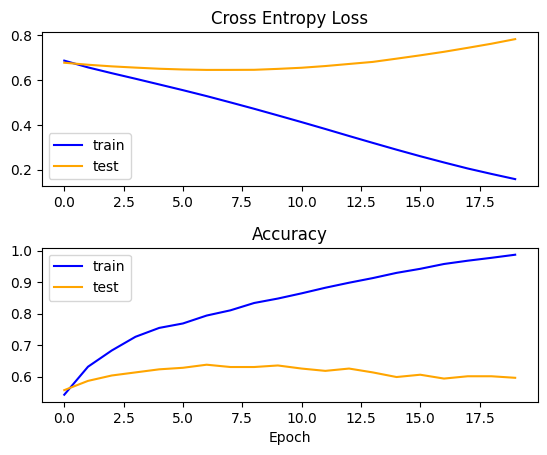

In [ ]:
print("ADAM_HOG")
eval(history_ADAM_HOG, modelADAM_HOG)
ADAMPredictions = modelADAM_HOG.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)

## Test Edge for SGD + ADAM

ADAM_Edge


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

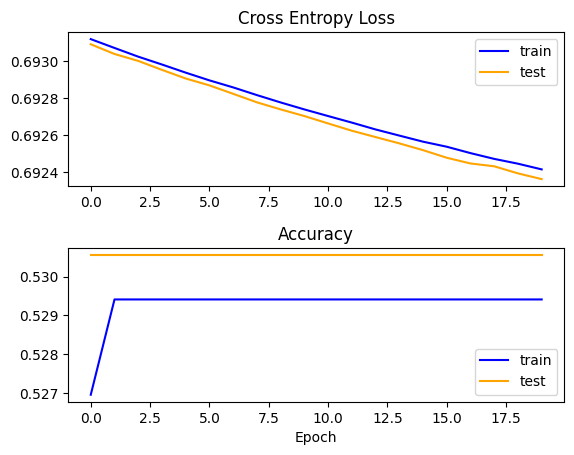

In [ ]:
print("ADAM_Edge")
eval(history_ADAM_Edge, modelADAM_Edge)
ADAMPredictions = modelADAM_Edge.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)

## ELA for SGD + ADAM

ADAM_ELA


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

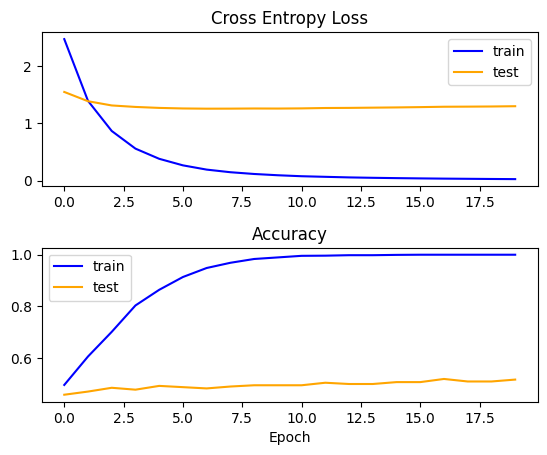

In [ ]:
print("ADAM_ELA")
eval(history_ADAM_ELA, modelADAM_ELA)
ADAMPredictions = modelADAM_ELA.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)

## Fourier transform for SGD + ADAM

ADAM__Fourier


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

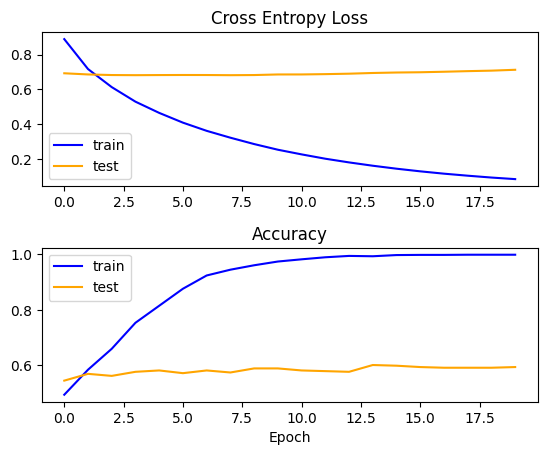

In [ ]:
print("ADAM__Fourier")
eval(history_ADAM_Fourier, modelADAM_Fourier)
ADAMPredictions = modelADAM_Fourier.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)

## Edge Orientation Distribution for SGD + ADAM

ADAM_Orientation


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

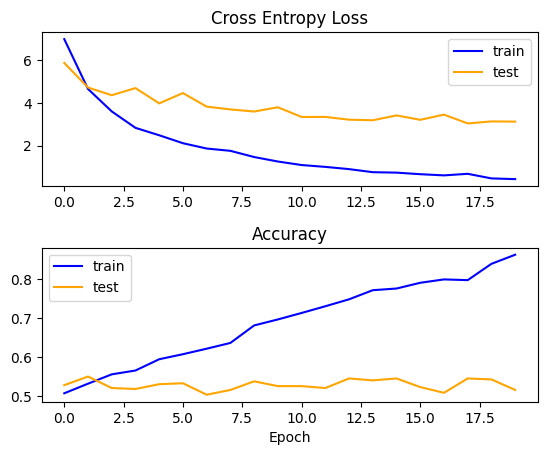

In [ ]:
print("ADAM_Orientation")
eval(history_ADAM_Orientation, modelADAM_Orientation)
ADAMPredictions = modelADAM_Orientation.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)


## Color Distribution for ADAM

ADAM_Color


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

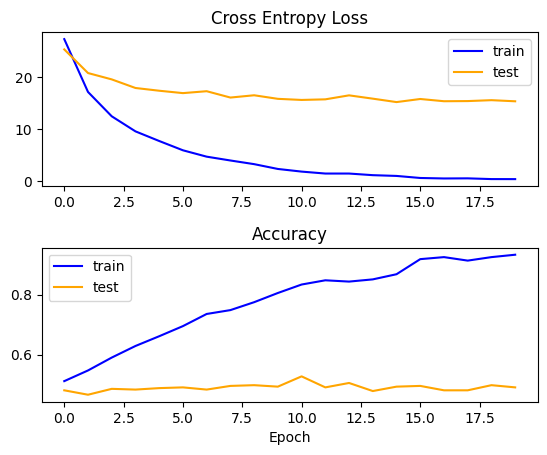

In [ ]:
print("ADAM_Color")
eval(history_ADAM_Color, modelADAM_Color)
ADAMPredictions = modelADAM_Color.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)


## Dominant Colors for ADAM

ADAM_Dominant


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

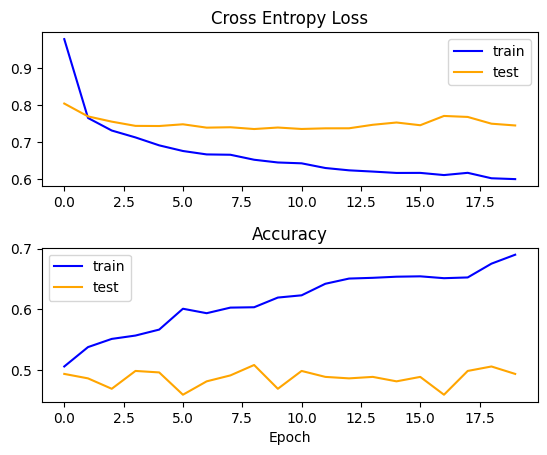

In [ ]:
print("ADAM_Dominant")
eval(history_ADAM_Dominant, modelADAM_Dominant)
ADAMPredictions = modelADAM_Dominant.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

Analysis(ADAMTrueLabels,ADAMPredictedLabels)


## Test DinoV2 for SGD + ADAM

In [ ]:
from transformers import AutoImageProcessor, Dinov2Model
from PIL import Image
import torch
import numpy as np

def load_dinov2_model(model_name="facebook/dinov2-base", device='cuda' if torch.cuda.is_available() else 'cpu'):
    """Load DinoV2 image process and model"""
    processor = AutoImageProcessor.from_pretrained(model_name)
    model = Dinov2Model.from_pretrained(model_name)
    model.eval()  # evaluate mode
    model.to(device)
    return processor, model, device

def extract_dinov2_features(image_path, processor, model, device):
    """Extract dinoV2 features"""
    # load and process iamges
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors="pt").to(device)

    # extract features
    with torch.no_grad():
        outputs = model(**inputs)
    # get [CLS] token feautres（dimentison is 768）
    features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return features.flatten()  # return one dimension array
def ProcessingImage_dinov2(path, processor, model, device):
    """Extract image features from Dinov2"""
    features = extract_dinov2_features(path, processor, model, device)
    return features

# Load dinov2 model
processor, model, device = load_dinov2_model()

# extract image features with dinov2
MeregedDf['image'] = MeregedDf['Paths'].apply(lambda x: ProcessingImage_dinov2(x, processor, model, device))

# 80% train, 20% test
TrainDf, TestDf = train_test_split(MeregedDf, test_size=0.2, stratify=MeregedDf['Real'], random_state=123)

# stack feature vectors into train and test data
XTrain_dinov2 = np.vstack(TrainDf['image'].values).astype(np.float32)   # shapre is (n_samples, 768)
YTrain = TrainDf['Real'].values.astype(np.float32)
XTest_dinov2 = np.vstack(TestDf['image'].values)   # shape is (n_samples, 768)
YTest = TestDf['Real'].values

# change model infra to adjust dinov2 feature (input dimension 768)
def modelSGD_dinov2(input_dim=768):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    opt = SGD(learning_rate=0.0001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def modelADAM_dinov2(input_dim=768):
    model = Sequential()
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# train sgd
modelSGD_dinov2 = modelSGD_dinov2(input_dim=XTrain_dinov2.shape[1])
modelSGD_dinov2.summary()
history_SGD_dinov2 = modelSGD_dinov2.fit(XTrain_dinov2, YTrain, epochs=20, batch_size=32, validation_data=(XTest_dinov2, YTest))

In [ ]:
modelADAM_dinov2 = modelADAM_dinov2()
modelADAM_dinov2.summary()
history_ADAM_dinov2 = modelADAM_dinov2.fit(XTrain_dinov2, YTrain_dinov2, epochs=20, batch_size=32, validation_data=(XTest_dinov2, YTest_dinov2))

In [ ]:
print("Using SGD + Dinov2")
eval(history1, model1)
SGDPredictions = model1.predict(XTest)
SGDPredictedLabels = np.round(SGDPredictions).flatten().astype(int)
SGDTrueLabels = np.round(YTest).flatten().astype(int)

In [ ]:
Analysis(SGDTrueLabels,SGDPredictedLabels)

In [ ]:
print("Using ADAM + Dinov2")
eval(history2, model2)
ADAMPredictions = model1.predict(XTest)
ADAMPredictedLabels = np.round(ADAMPredictions).flatten().astype(int)
ADAMTrueLabels = np.round(YTest).flatten().astype(int)

In [ ]:
Analysis(ADAMTrueLabels,ADAMPredictedLabels)